Libraries used for Data Cleaning:
* Pandas
* NumPy
* Matplotlib
* Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv('cleaned_data.csv')

# **Data Cleaning**

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df

,Reviews,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,From,Destination
0,I flew with British Airways from Heathrow to H...,Solo Leisure,Economy Class,London to Hannover,April 2024,3.0,3.0,1.0,1,0,London,Hannover
1,Manchester to Copenhagen via London on 30th Ap...,Solo Leisure,Economy Class,Manchester to Copenhagen via London,April 2024,3.0,3.0,4.0,4,1,Manchester,Copenhagen via London
2,I have never seen such disrespect to a custome...,Solo Leisure,Economy Class,London to Valencia,April 2024,1.0,1.0,1.0,1,0,London,Valencia
3,Paid for a 14 hour long flight ticket which in...,Business,Economy Class,Singapore to London,April 2024,3.0,3.0,1.0,1,0,Singapore,London
4,Very inconsiderate PA announcements were made ...,Business,Economy Class,Madrid to London Heathrow,April 2024,3.0,1.0,2.0,1,0,Madrid,London Heathrow
...,...,...,...,...,...,...,...,...,...,...,...,...
899,Miami to London Heathrow with British Airways....,Couple Leisure,Business Class,Miami to London Heathrow,April 2019,4.0,5.0,4.0,4,1,Miami,London Heathrow
900,Houston to London. The plane left an hour late...,Solo Leisure,Economy Class,Houston to London Heathrow,April 2019,2.0,1.0,2.0,2,0,Houston,London Heathrow
901,London to Delhi. The worst business class trip...,Business,Business Class,London to Delhi,April 2019,2.0,2.0,3.0,2,0,London,Delhi
902,Bucharest to London. My flight with British Ai...,Business,Economy Class,Bucharest to London,April 2019,2.0,2.0,1.0,1,0,Bucharest,London


In [ ]:
df.columns

Index(['Reviews', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Ground Service',
       'Value For Money', 'Recommended', 'From', 'Destination'],
      dtype='object')

In [ ]:
df= df.rename(columns={'Type Of Traveller':'TypeOfTraveller',
                   'Seat Type':'SeatType',
                   'Date Flown':'DateFlown',
                   'Seat Comfort':'SeatComfort',
                   'Cabin Staff Service':'CabinStaffService',
                   'Ground Service':'GroundService',
                   'Value For Money':'ValueForMoney'})

In [ ]:
df.isna().sum()

Reviews              0
TypeOfTraveller      0
SeatType             0
Route                0
DateFlown            0
SeatComfort          0
CabinStaffService    0
GroundService        0
ValueForMoney        0
Recommended          0
From                 0
Destination          3
dtype: int64

In [ ]:
df = df.dropna()

# **Feature Understanding**

In [ ]:
df[["From","Destination"]].value_counts().head(10)

From           Destination 
Vancouver      London          10
London         Delhi            7
Johannesburg   London           7
London         Hong Kong        7
Washington     London           6
London         Paris            6
               Cape Town        6
San Francisco  London           6
London         Johannesburg     6
New York       London           5
Name: count, dtype: int64

In [ ]:
df.columns
columns=['TypeOfTraveller',
         'SeatType',
         'SeatComfort',
         'CabinStaffService',
         'GroundService',
         'ValueForMoney',
         'Recommended',
         ['From', 'Destination']]
for x in columns:
  print(df[x].value_counts().head(10))
  print()

TypeOfTraveller
Couple Leisure    315
Solo Leisure      282
Business          166
Family Leisure    138
Name: count, dtype: int64

SeatType
Economy Class      492
Business Class     317
Premium Economy     73
First Class         19
Name: count, dtype: int64

SeatComfort
1.0    238
3.0    227
4.0    172
2.0    146
5.0    118
Name: count, dtype: int64

CabinStaffService
5.0    251
1.0    205
3.0    170
4.0    167
2.0    108
Name: count, dtype: int64

GroundService
1.0    357
4.0    163
5.0    147
3.0    146
2.0     88
Name: count, dtype: int64

ValueForMoney
1    358
3    146
4    141
5    129
2    127
Name: count, dtype: int64

Recommended
0    577
1    324
Name: count, dtype: int64

From           Destination 
Vancouver      London          10
London         Delhi            7
Johannesburg   London           7
London         Hong Kong        7
Washington     London           6
London         Paris            6
               Cape Town        6
San Francisco  London           6
London  

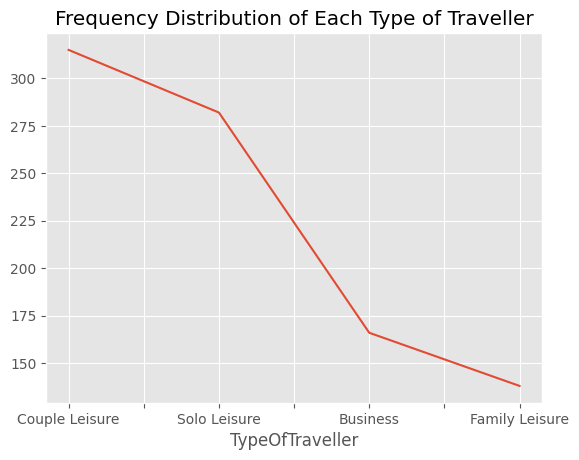

In [ ]:
ax=df["TypeOfTraveller"].value_counts().head(10).plot(kind="line")
ax.set_title("Frequency Distribution of Each Type of Traveller")
plt.show()

In [ ]:
df["AvgRating"]=df[['SeatComfort',
         'CabinStaffService',
         'GroundService',
         'ValueForMoney']].mean(axis=1)

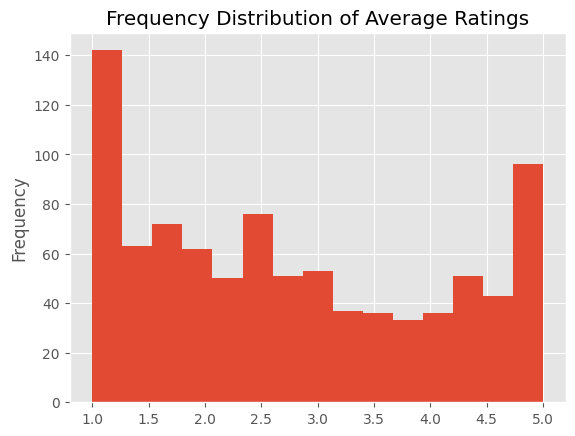

In [ ]:
ax= df["AvgRating"].plot(kind='hist',bins=15)
ax.set_title("Frequency Distribution of Average Ratings")
plt.show()

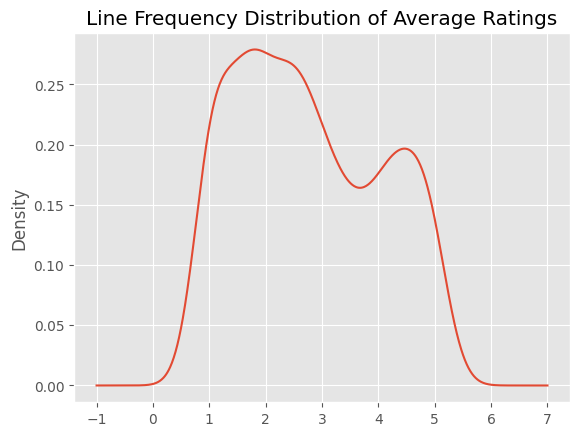

In [ ]:
ax = df["AvgRating"].plot(kind='kde')
ax.set_title("Line Frequency Distribution of Average Ratings")
plt.show()

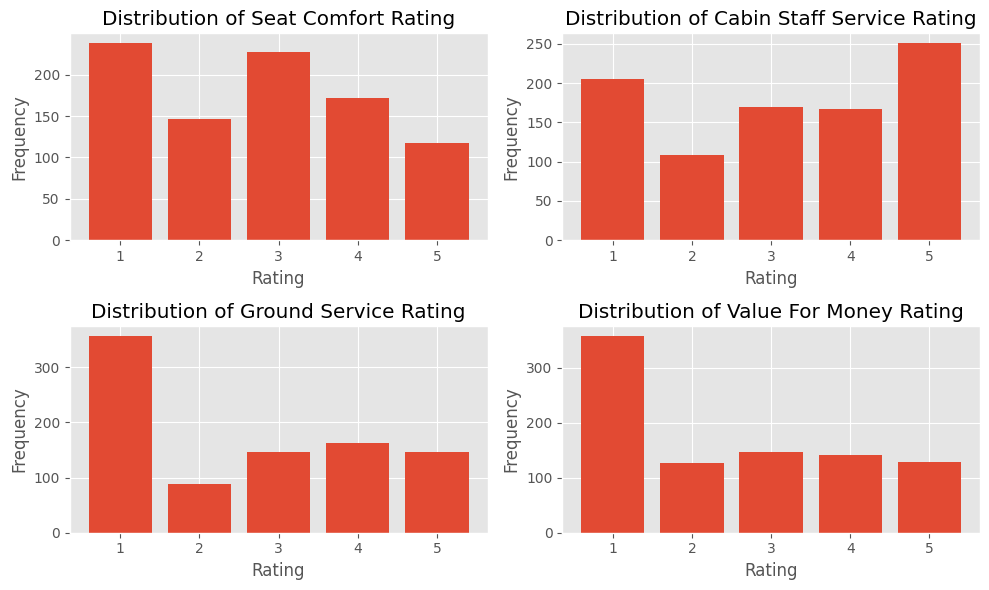

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].bar(df["SeatComfort"].value_counts().sort_index().index, df["SeatComfort"].value_counts().sort_index())
axs[0, 0].set_title("Distribution of Seat Comfort Rating")
axs[0, 0].set_xlabel("Rating")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].bar(df["CabinStaffService"].value_counts().sort_index().index, df["CabinStaffService"].value_counts().sort_index())
axs[0, 1].set_title("Distribution of Cabin Staff Service Rating")
axs[0, 1].set_xlabel("Rating")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].bar(df["GroundService"].value_counts().sort_index().index, df["GroundService"].value_counts().sort_index())
axs[1, 0].set_title("Distribution of Ground Service Rating")
axs[1, 0].set_xlabel("Rating")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].bar(df["ValueForMoney"].value_counts().sort_index().index, df["ValueForMoney"].value_counts().sort_index())
axs[1, 1].set_title("Distribution of Value For Money Rating")
axs[1, 1].set_xlabel("Rating")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

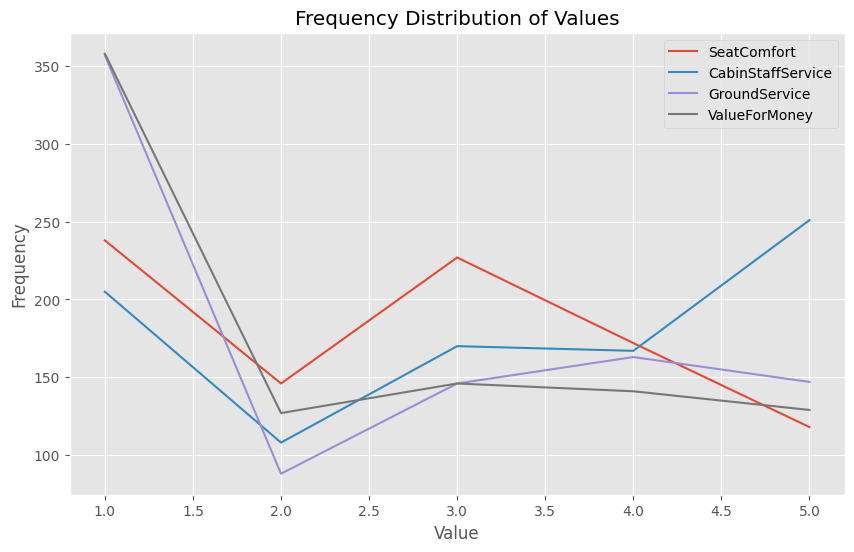

In [ ]:
freq_data = {}
columns=['SeatComfort',
         'CabinStaffService',
         'GroundService',
         'ValueForMoney']
for col in columns:
    freq_data[col] = df[col].value_counts().sort_index()

plt.figure(figsize=(10, 6))
for col, freq in freq_data.items():
    plt.plot(freq.index, freq.values, label=col)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Values")
plt.legend()
plt.grid(True)
plt.show()

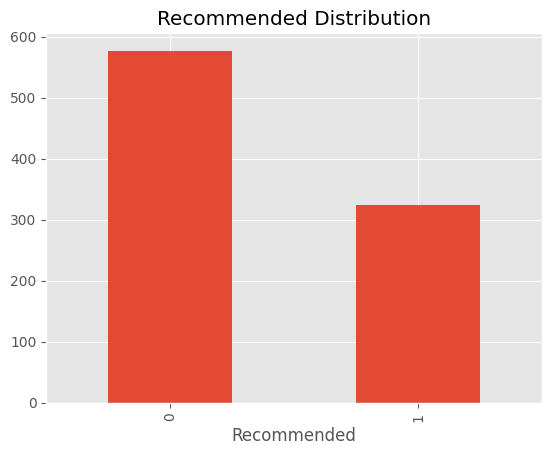

In [ ]:
ax=df["Recommended"].value_counts().sort_index().plot(kind='bar')
ax.set_title("Recommended Distribution")
plt.show()

EDA on Sentiment Analysis

In [ ]:
df2=pd.read_csv('sentiment_data.csv')

In [ ]:
columns=['DateFlown',
         'SeatComfort',
         'CabinStaffService',
         'GroundService',
         'ValueForMoney']
for x in columns:
  df2[x]=df[x]

In [ ]:
df2

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Reviews,Average Rating,Recommended,SeatComfort,CabinStaffService,GroundService,ValueForMoney,DateFlown
0,0,0.086,0.894,0.020,-0.9381,0.856823,0.129664,0.013513,I flew with British Airways from Heathrow to H...,2.00,0,3.0,3.0,1.0,1.0,April 2024
1,1,0.100,0.793,0.107,-0.0754,0.460547,0.364771,0.174683,Manchester to Copenhagen via London on 30th Ap...,3.50,1,3.0,3.0,4.0,4.0,April 2024
2,2,0.102,0.824,0.074,-0.4401,0.973114,0.024247,0.002639,I have never seen such disrespect to a custome...,1.00,0,1.0,1.0,1.0,1.0,April 2024
3,3,0.098,0.870,0.032,-0.9394,0.808972,0.171510,0.019518,Paid for a 14 hour long flight ticket which in...,2.00,0,3.0,3.0,1.0,1.0,April 2024
4,4,0.173,0.718,0.109,-0.9777,0.915972,0.075356,0.008672,Very inconsiderate PA announcements were made ...,1.75,0,3.0,1.0,2.0,1.0,April 2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,899,0.000,0.740,0.260,0.9485,0.002090,0.029072,0.968839,Miami to London Heathrow with British Airways....,4.25,1,3.0,3.0,3.0,3.0,May 2019
877,900,0.101,0.829,0.071,-0.6652,0.374557,0.502753,0.122690,Houston to London. The plane left an hour late...,1.75,0,4.0,3.0,1.0,3.0,May 2019
878,901,0.153,0.847,0.000,-0.9732,0.918997,0.071465,0.009538,London to Delhi. The worst business class trip...,2.25,0,3.0,1.0,3.0,3.0,May 2019
879,902,0.071,0.905,0.024,-0.7437,0.736000,0.242041,0.021959,Bucharest to London. My flight with British Ai...,1.50,0,3.0,1.0,1.0,2.0,May 2019


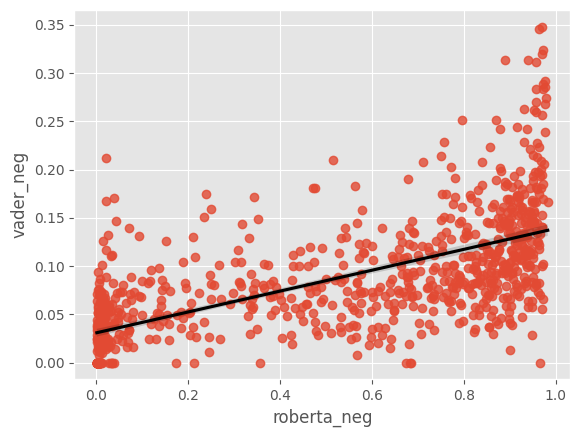

In [ ]:
sns.regplot(x='roberta_neg', y='vader_neg', data=df2,line_kws={'color':'black'})
plt.show()

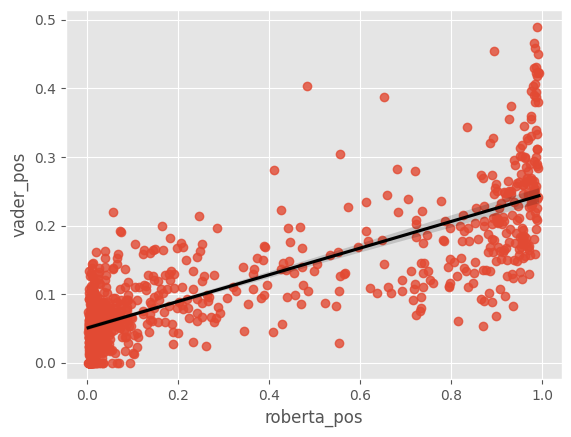

In [ ]:
sns.regplot(x='roberta_pos', y='vader_pos', data=df2,line_kws={'color':'black'})
plt.show()

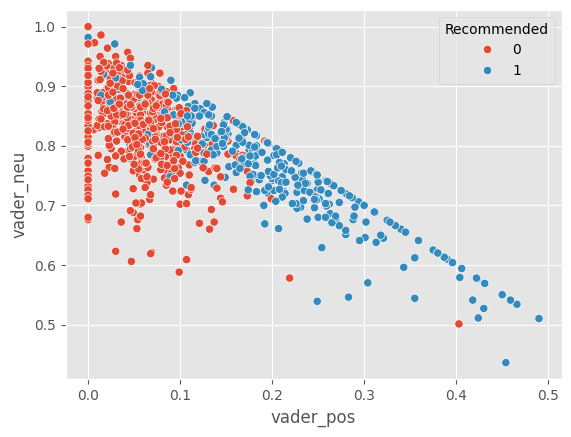

In [ ]:
sns.scatterplot(x='vader_pos', y='vader_neu', hue='Recommended', data=df2)
plt.show()

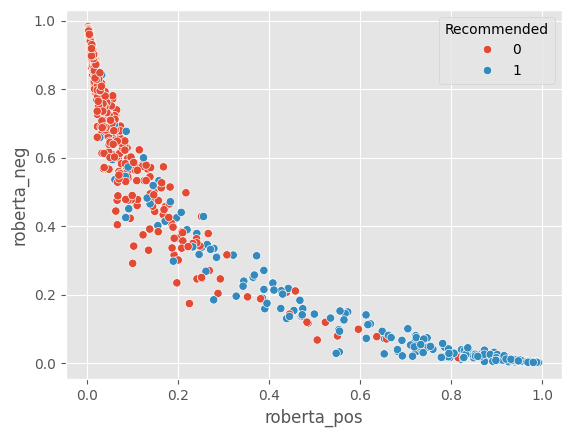

In [ ]:
sns.scatterplot(x='roberta_pos', y='roberta_neg', hue='Recommended', data=df2)
plt.show()

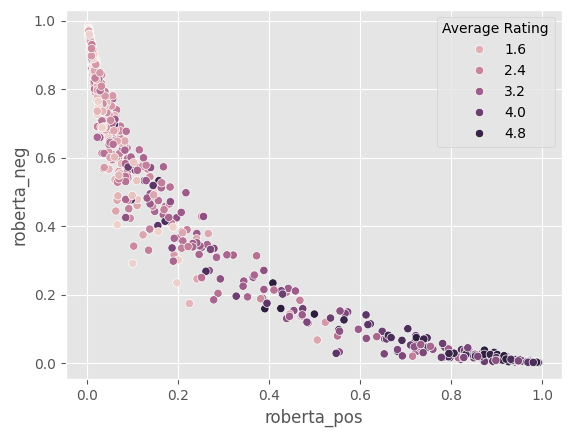

In [ ]:
sns.scatterplot(x='roberta_pos', y='roberta_neg', hue='Average Rating', data=df2)
plt.show()

In [ ]:
columns=['SeatComfort',
         'CabinStaffService',
         'GroundService',
         'ValueForMoney',
         'Average Rating',
         'roberta_pos',
         'roberta_neg',
         'vader_pos',
         'vader_neg',
         'Recommended']

columns2=['Average Rating',
         'roberta_pos',
         'roberta_neg',
          'vader_pos',
         'vader_neg',
         'Recommended']

In [ ]:
whole_corr=df2[columns].corr()

In [ ]:
overall_corr=df2[columns2].corr()

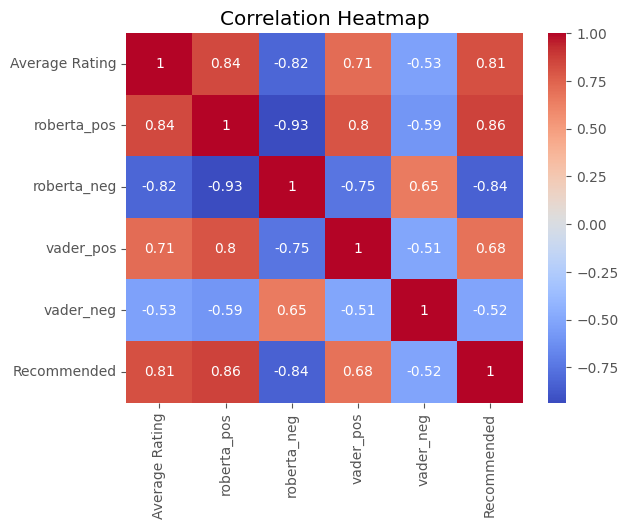

In [ ]:
ax= sns.heatmap(overall_corr, annot=True,cmap="coolwarm")
ax.set_title("Correlation Heatmap")
plt.show()

<Axes: >

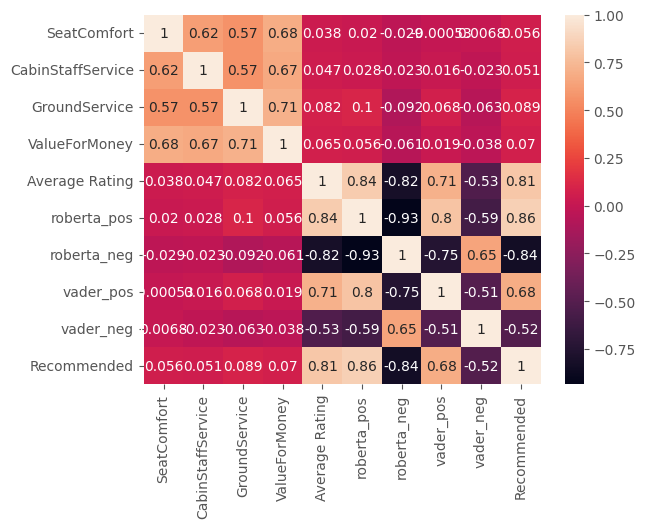

In [ ]:
sns.heatmap(whole_corr,annot=True)